In [ ]:
%matplotlib inline

## YOLO

In [2]:
from src.hpe.common.mutators import convert_to_bgr
from src.hpe.common.metrics import calc_precision_and_recall, calc_mean_average_precision
from src.hpe.yolo.performance import DistanceCollector, PerformanceLogger, EstimationCollector, \
    read_distances, read_estimations

from src.hpe.common.plot import plot_precision_recall_curve
from src.hpe.yolo.plot import plot_yolo_average_distances

loaded labels


### Distances

In [ ]:
# default estimation
collector = DistanceCollector()
distances = collector.collect(name="distances")

In [ ]:
# estimation on bgr images
distances_bgr = collector.collect(
    name="distances_bgr",
    image_mutators=[convert_to_bgr]
)

In [ ]:
distances = read_distances()
distances_bgr = read_distances(dataset_name="distances_bgr")

### Performance log

In [ ]:
logger = PerformanceLogger()
logger.collect(name="Yolov11m-pose")

In [ ]:
# calculate and log performance on bgr images
logger.collect(
    name="Yolov11m-pose on bgr",
    image_mutators=[convert_to_bgr]
)

### Estimations

In [3]:
collector = EstimationCollector()

In [ ]:
estimations = collector.collect(name="estimations")

In [4]:
estimations_bgr = collector.collect(
    name="estimations_bgr", 
    image_mutators={convert_to_bgr})


0: 448x640 1 person, 37.3ms
Speed: 44.3ms preprocess, 37.3ms inference, 1338.5ms postprocess per image at shape (1, 3, 448, 640)

0: 640x448 1 person, 37.7ms
Speed: 3.6ms preprocess, 37.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 448)

0: 448x640 1 person, 15.6ms
Speed: 2.8ms preprocess, 15.6ms inference, 3.5ms postprocess per image at shape (1, 3, 448, 640)

0: 640x448 (no detections), 15.4ms
Speed: 2.7ms preprocess, 15.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)

0: 448x640 1 person, 19.0ms
Speed: 2.8ms preprocess, 19.0ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

0: 640x448 1 person, 19.0ms
Speed: 2.8ms preprocess, 19.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 448)

0: 448x640 1 person, 16.0ms
Speed: 2.6ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)

0: 640x448 1 person, 15.9ms
Speed: 2.7ms preprocess, 15.9ms inference, 1.9ms postprocess per image at shap

In [ ]:
estimations = read_estimations()
estimations_bgr = read_estimations(name="estimations_bgr")

In [ ]:
pnr = calc_precision_and_recall(estimations)
mAP = calc_mean_average_precision(pnr)
print(f"Mean Average Precision = {mAP}")

In [5]:
pnr_bgr = calc_precision_and_recall(estimations_bgr)
mAP_bgr = calc_mean_average_precision(pnr_bgr)
print(f"Mean Average Precision = {mAP_bgr}")

Mean Average Precision = 0.27733376045681657


### plots

In [ ]:
plot_yolo_average_distances(distances=distances)

In [ ]:
plot_yolo_average_distances(distances=distances_bgr)

In [ ]:
plot_precision_recall_curve(pnr)

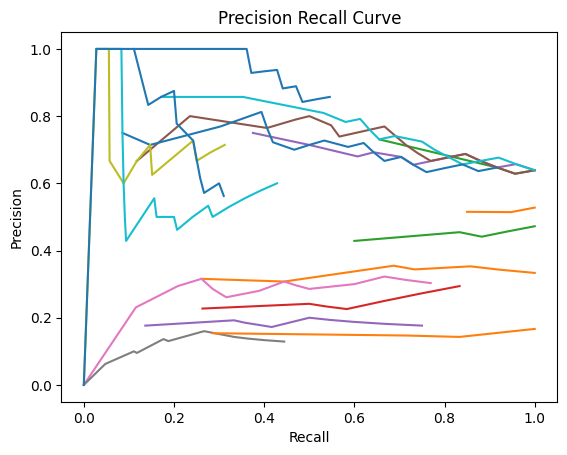

In [6]:
plot_precision_recall_curve(pnr_bgr)

In [ ]:
from src.hpe.yolo.play import play_with_hpe as play_with_yolo_hpe
from glob import glob
from random import choice

video_paths = glob("data/samples/**/*.*")
video_path = choice(video_paths)

play_with_yolo_hpe(video_path)

## MediaPipe

In [ ]:
from src.hpe.mp.performance import DistanceCollector
from src.hpe.common.mutators import convert_to_bgr

In [ ]:
collector = DistanceCollector()
distances = collector.collect(name="distances")

In [ ]:
# estimation on bgr images
distances_bgr = collector.collect(
    name="distances_bgr",
    image_mutators=[convert_to_bgr]
)

In [ ]:
from src.hpe.mp.performance import PerformanceLogger

In [ ]:
logger = PerformanceLogger()
logger.collect(name="MediaPipe")

In [ ]:
logger.collect(name="MediaPipe on bgr",
    image_mutators=[convert_to_bgr])

In [ ]:
from src.hpe.mp.performance import read_distances
distances = read_distances()
distances_bgr = read_distances(dataset_name="distances_bgr")

In [ ]:
from src.hpe.mp.plot import plot_mediapipe_average_distances

In [ ]:

plot_mediapipe_average_distances(distances=distances)

In [ ]:
plot_mediapipe_average_distances(distances=distances_bgr)

In [ ]:
from src.hpe.mp.play import play_with_hpe
from glob import glob
from random import choice

video_paths = glob("data/samples/**/*.*")
video_path = choice(video_paths)

play_with_hpe(video_path)

## Comparison

In [ ]:
from src.hpe.yolo.performance import read_distances as read_yolo_distances
from src.hpe.mp.performance import read_distances as read_mp_distances
from src.hpe.common.plot import plot_distances_boxplot

In [ ]:
mp_dist = read_mp_distances(dataset_name="distances")
mp_bgr_dist = read_mp_distances(dataset_name="distances_bgr")

yolo_dist = read_yolo_distances(dataset_name="distances")
yolo_bgr_dist = read_yolo_distances(dataset_name="distances_bgr")

In [ ]:
plot_distances_boxplot(
    None,
    ("MediaPipe", mp_dist),
    ("MediaPipe on bgr", mp_bgr_dist),
    ("Yolov11", yolo_dist),
    ("Yolov11 on bgr", yolo_bgr_dist))

In [ ]:
plot_distances_boxplot(
    (0, 10),
    ("MediaPipe", mp_dist),
    ("MediaPipe on bgr", mp_bgr_dist),
    ("Yolov11", yolo_dist),
    ("Yolov11 on bgr", yolo_bgr_dist))